In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from sklearn.model_selection import train_test_split

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']


def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

In [3]:
# Get the data from UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True)

# Split the data into train and test with 80 train / 20 test
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

# Get Y1 and Y2 as the 2 outputs and format them as np arrays
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_Y = format_output(train)
test_Y = format_output(test)

# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [4]:
# Define model layers.
input_layer = Input(shape=(len(train .columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 128)          1152        input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          16512       dense[0][0]                      
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 64)           8256        dense_1[0][0]                    
______________________________________________________________________________________________

In [5]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

C:\Users\Gaya3selva\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [6]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 2s 8ms/step - loss: 564.1289 - y1_output_loss: 269.8726 - y2_output_loss: 294.2563 - y1_output_root_mean_squared_error: 15.8188 - y2_output_root_mean_squared_error: 16.4893 - val_loss: 32.1151 - val_y1_output_loss: 12.9142 - val_y2_output_loss: 19.2009 - val_y1_output_root_mean_squared_error: 3.5936 - val_y2_output_root_mean_squared_error: 4.3819
Epoch 2/500
62/62 [==============================] - 0s 3ms/step - loss: 29.5426 - y1_output_loss: 11.7536 - y2_output_loss: 17.7890 - y1_output_root_mean_squared_error: 3.4251 - y2_output_root_mean_squared_error: 4.2082 - val_loss: 23.7472 - val_y1_output_loss: 9.7565 - val_y2_output_loss: 13.9907 - val_y1_output_root_mean_squared_error: 3.1235 - val_y2_output_root_mean_squared_error: 3.7404
Epoch 3/500
62/62 [==============================] - 0s 3ms/step - loss: 28.4487 - y1_output_loss: 10.8023 - y2_output_loss: 17.6464 - y1_output_root_mean_squared_error: 3.2833 - y2_output_root_mean_squ

Epoch 22/500
62/62 [==============================] - 0s 3ms/step - loss: 16.6632 - y1_output_loss: 6.0520 - y2_output_loss: 10.6112 - y1_output_root_mean_squared_error: 2.4421 - y2_output_root_mean_squared_error: 3.2099 - val_loss: 12.3848 - val_y1_output_loss: 4.9039 - val_y2_output_loss: 7.4809 - val_y1_output_root_mean_squared_error: 2.2145 - val_y2_output_root_mean_squared_error: 2.7351
Epoch 23/500
62/62 [==============================] - 0s 2ms/step - loss: 15.6599 - y1_output_loss: 5.7653 - y2_output_loss: 9.8946 - y1_output_root_mean_squared_error: 2.3949 - y2_output_root_mean_squared_error: 3.1369 - val_loss: 28.9011 - val_y1_output_loss: 8.7983 - val_y2_output_loss: 20.1028 - val_y1_output_root_mean_squared_error: 2.9662 - val_y2_output_root_mean_squared_error: 4.4836
Epoch 24/500
62/62 [==============================] - 0s 2ms/step - loss: 13.2638 - y1_output_loss: 4.8202 - y2_output_loss: 8.4436 - y1_output_root_mean_squared_error: 2.1924 - y2_output_root_mean_squared_erro

62/62 [==============================] - 0s 2ms/step - loss: 6.8557 - y1_output_loss: 2.4350 - y2_output_loss: 4.4207 - y1_output_root_mean_squared_error: 1.5596 - y2_output_root_mean_squared_error: 2.0925 - val_loss: 7.4880 - val_y1_output_loss: 2.5188 - val_y2_output_loss: 4.9692 - val_y1_output_root_mean_squared_error: 1.5871 - val_y2_output_root_mean_squared_error: 2.2292
Epoch 43/500
62/62 [==============================] - 0s 2ms/step - loss: 7.7981 - y1_output_loss: 2.3914 - y2_output_loss: 5.4067 - y1_output_root_mean_squared_error: 1.5428 - y2_output_root_mean_squared_error: 2.3220 - val_loss: 10.0734 - val_y1_output_loss: 4.0303 - val_y2_output_loss: 6.0431 - val_y1_output_root_mean_squared_error: 2.0076 - val_y2_output_root_mean_squared_error: 2.4583
Epoch 44/500
62/62 [==============================] - 0s 2ms/step - loss: 8.0374 - y1_output_loss: 2.7172 - y2_output_loss: 5.3202 - y1_output_root_mean_squared_error: 1.6432 - y2_output_root_mean_squared_error: 2.2824 - val_los

Epoch 63/500
62/62 [==============================] - 0s 2ms/step - loss: 6.5129 - y1_output_loss: 1.8458 - y2_output_loss: 4.6671 - y1_output_root_mean_squared_error: 1.3573 - y2_output_root_mean_squared_error: 2.1484 - val_loss: 5.7584 - val_y1_output_loss: 1.6180 - val_y2_output_loss: 4.1404 - val_y1_output_root_mean_squared_error: 1.2720 - val_y2_output_root_mean_squared_error: 2.0348
Epoch 64/500
62/62 [==============================] - 0s 2ms/step - loss: 5.9255 - y1_output_loss: 1.6936 - y2_output_loss: 4.2319 - y1_output_root_mean_squared_error: 1.2995 - y2_output_root_mean_squared_error: 2.0297 - val_loss: 9.6464 - val_y1_output_loss: 3.1683 - val_y2_output_loss: 6.4781 - val_y1_output_root_mean_squared_error: 1.7800 - val_y2_output_root_mean_squared_error: 2.5452
Epoch 65/500
62/62 [==============================] - 0s 2ms/step - loss: 5.3645 - y1_output_loss: 1.5553 - y2_output_loss: 3.8093 - y1_output_root_mean_squared_error: 1.2434 - y2_output_root_mean_squared_error: 1.94

Epoch 84/500
62/62 [==============================] - 0s 2ms/step - loss: 3.6967 - y1_output_loss: 0.8621 - y2_output_loss: 2.8346 - y1_output_root_mean_squared_error: 0.9266 - y2_output_root_mean_squared_error: 1.6807 - val_loss: 2.9976 - val_y1_output_loss: 0.5932 - val_y2_output_loss: 2.4045 - val_y1_output_root_mean_squared_error: 0.7702 - val_y2_output_root_mean_squared_error: 1.5506
Epoch 85/500
62/62 [==============================] - 0s 2ms/step - loss: 6.9463 - y1_output_loss: 2.0597 - y2_output_loss: 4.8865 - y1_output_root_mean_squared_error: 1.4088 - y2_output_root_mean_squared_error: 2.1786 - val_loss: 3.2265 - val_y1_output_loss: 0.6407 - val_y2_output_loss: 2.5858 - val_y1_output_root_mean_squared_error: 0.8004 - val_y2_output_root_mean_squared_error: 1.6080
Epoch 86/500
62/62 [==============================] - 0s 2ms/step - loss: 2.6174 - y1_output_loss: 0.7005 - y2_output_loss: 1.9169 - y1_output_root_mean_squared_error: 0.8310 - y2_output_root_mean_squared_error: 1.37

62/62 [==============================] - 0s 2ms/step - loss: 2.9504 - y1_output_loss: 0.5771 - y2_output_loss: 2.3733 - y1_output_root_mean_squared_error: 0.7579 - y2_output_root_mean_squared_error: 1.5381 - val_loss: 2.8146 - val_y1_output_loss: 0.4431 - val_y2_output_loss: 2.3715 - val_y1_output_root_mean_squared_error: 0.6657 - val_y2_output_root_mean_squared_error: 1.5400
Epoch 105/500
62/62 [==============================] - 0s 2ms/step - loss: 2.1097 - y1_output_loss: 0.5001 - y2_output_loss: 1.6096 - y1_output_root_mean_squared_error: 0.7033 - y2_output_root_mean_squared_error: 1.2678 - val_loss: 2.9234 - val_y1_output_loss: 0.6593 - val_y2_output_loss: 2.2641 - val_y1_output_root_mean_squared_error: 0.8120 - val_y2_output_root_mean_squared_error: 1.5047
Epoch 106/500
62/62 [==============================] - 0s 2ms/step - loss: 2.6711 - y1_output_loss: 0.5881 - y2_output_loss: 2.0831 - y1_output_root_mean_squared_error: 0.7655 - y2_output_root_mean_squared_error: 1.4393 - val_lo

62/62 [==============================] - 0s 2ms/step - loss: 2.3580 - y1_output_loss: 0.4672 - y2_output_loss: 1.8909 - y1_output_root_mean_squared_error: 0.6820 - y2_output_root_mean_squared_error: 1.3731 - val_loss: 2.2543 - val_y1_output_loss: 0.3538 - val_y2_output_loss: 1.9005 - val_y1_output_root_mean_squared_error: 0.5948 - val_y2_output_root_mean_squared_error: 1.3786
Epoch 125/500
62/62 [==============================] - 0s 2ms/step - loss: 7.4932 - y1_output_loss: 1.8258 - y2_output_loss: 5.6674 - y1_output_root_mean_squared_error: 1.3310 - y2_output_root_mean_squared_error: 2.3509 - val_loss: 3.0514 - val_y1_output_loss: 0.3943 - val_y2_output_loss: 2.6571 - val_y1_output_root_mean_squared_error: 0.6279 - val_y2_output_root_mean_squared_error: 1.6301
Epoch 126/500
62/62 [==============================] - 0s 2ms/step - loss: 10.9806 - y1_output_loss: 3.7712 - y2_output_loss: 7.2095 - y1_output_root_mean_squared_error: 1.7648 - y2_output_root_mean_squared_error: 2.5075 - val_l

62/62 [==============================] - 0s 2ms/step - loss: 3.1422 - y1_output_loss: 0.5879 - y2_output_loss: 2.5542 - y1_output_root_mean_squared_error: 0.7598 - y2_output_root_mean_squared_error: 1.5831 - val_loss: 2.2995 - val_y1_output_loss: 0.4847 - val_y2_output_loss: 1.8148 - val_y1_output_root_mean_squared_error: 0.6962 - val_y2_output_root_mean_squared_error: 1.3472
Epoch 145/500
62/62 [==============================] - 0s 2ms/step - loss: 2.9084 - y1_output_loss: 0.5997 - y2_output_loss: 2.3087 - y1_output_root_mean_squared_error: 0.7688 - y2_output_root_mean_squared_error: 1.5073 - val_loss: 1.9699 - val_y1_output_loss: 0.3159 - val_y2_output_loss: 1.6541 - val_y1_output_root_mean_squared_error: 0.5620 - val_y2_output_root_mean_squared_error: 1.2861
Epoch 146/500
62/62 [==============================] - 0s 1ms/step - loss: 1.5365 - y1_output_loss: 0.3140 - y2_output_loss: 1.2225 - y1_output_root_mean_squared_error: 0.5564 - y2_output_root_mean_squared_error: 1.0944 - val_lo

62/62 [==============================] - 0s 1ms/step - loss: 2.1785 - y1_output_loss: 0.5387 - y2_output_loss: 1.6398 - y1_output_root_mean_squared_error: 0.7195 - y2_output_root_mean_squared_error: 1.2515 - val_loss: 1.4534 - val_y1_output_loss: 0.3135 - val_y2_output_loss: 1.1399 - val_y1_output_root_mean_squared_error: 0.5599 - val_y2_output_root_mean_squared_error: 1.0677
Epoch 165/500
62/62 [==============================] - 0s 2ms/step - loss: 1.9263 - y1_output_loss: 0.4026 - y2_output_loss: 1.5237 - y1_output_root_mean_squared_error: 0.6317 - y2_output_root_mean_squared_error: 1.2306 - val_loss: 2.6872 - val_y1_output_loss: 0.4512 - val_y2_output_loss: 2.2359 - val_y1_output_root_mean_squared_error: 0.6717 - val_y2_output_root_mean_squared_error: 1.4953
Epoch 166/500
62/62 [==============================] - 0s 2ms/step - loss: 1.3184 - y1_output_loss: 0.2427 - y2_output_loss: 1.0757 - y1_output_root_mean_squared_error: 0.4916 - y2_output_root_mean_squared_error: 1.0331 - val_lo

Epoch 185/500
62/62 [==============================] - 0s 1ms/step - loss: 1.1973 - y1_output_loss: 0.1920 - y2_output_loss: 1.0053 - y1_output_root_mean_squared_error: 0.4374 - y2_output_root_mean_squared_error: 1.0015 - val_loss: 1.2315 - val_y1_output_loss: 0.2283 - val_y2_output_loss: 1.0032 - val_y1_output_root_mean_squared_error: 0.4778 - val_y2_output_root_mean_squared_error: 1.0016
Epoch 186/500
62/62 [==============================] - 0s 1ms/step - loss: 1.1302 - y1_output_loss: 0.2228 - y2_output_loss: 0.9074 - y1_output_root_mean_squared_error: 0.4698 - y2_output_root_mean_squared_error: 0.9507 - val_loss: 3.2602 - val_y1_output_loss: 0.2133 - val_y2_output_loss: 3.0469 - val_y1_output_root_mean_squared_error: 0.4618 - val_y2_output_root_mean_squared_error: 1.7455
Epoch 187/500
62/62 [==============================] - 0s 2ms/step - loss: 2.0512 - y1_output_loss: 0.3797 - y2_output_loss: 1.6715 - y1_output_root_mean_squared_error: 0.6143 - y2_output_root_mean_squared_error: 1

Epoch 206/500
62/62 [==============================] - 0s 2ms/step - loss: 0.9503 - y1_output_loss: 0.1967 - y2_output_loss: 0.7536 - y1_output_root_mean_squared_error: 0.4382 - y2_output_root_mean_squared_error: 0.8591 - val_loss: 20.7400 - val_y1_output_loss: 7.0258 - val_y2_output_loss: 13.7143 - val_y1_output_root_mean_squared_error: 2.6506 - val_y2_output_root_mean_squared_error: 3.7033
Epoch 207/500
62/62 [==============================] - 0s 2ms/step - loss: 3.2387 - y1_output_loss: 1.1566 - y2_output_loss: 2.0821 - y1_output_root_mean_squared_error: 0.9690 - y2_output_root_mean_squared_error: 1.3569 - val_loss: 2.1382 - val_y1_output_loss: 0.2760 - val_y2_output_loss: 1.8622 - val_y1_output_root_mean_squared_error: 0.5254 - val_y2_output_root_mean_squared_error: 1.3646
Epoch 208/500
62/62 [==============================] - 0s 2ms/step - loss: 1.4231 - y1_output_loss: 0.4018 - y2_output_loss: 1.0213 - y1_output_root_mean_squared_error: 0.6281 - y2_output_root_mean_squared_error:

Epoch 227/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8875 - y1_output_loss: 0.1824 - y2_output_loss: 0.7051 - y1_output_root_mean_squared_error: 0.4264 - y2_output_root_mean_squared_error: 0.8369 - val_loss: 3.1605 - val_y1_output_loss: 0.2653 - val_y2_output_loss: 2.8952 - val_y1_output_root_mean_squared_error: 0.5151 - val_y2_output_root_mean_squared_error: 1.7015
Epoch 228/500
62/62 [==============================] - 0s 1ms/step - loss: 1.1400 - y1_output_loss: 0.2692 - y2_output_loss: 0.8708 - y1_output_root_mean_squared_error: 0.5174 - y2_output_root_mean_squared_error: 0.9296 - val_loss: 3.8256 - val_y1_output_loss: 0.2411 - val_y2_output_loss: 3.5845 - val_y1_output_root_mean_squared_error: 0.4910 - val_y2_output_root_mean_squared_error: 1.8933
Epoch 229/500
62/62 [==============================] - 0s 1ms/step - loss: 2.4055 - y1_output_loss: 0.6346 - y2_output_loss: 1.7709 - y1_output_root_mean_squared_error: 0.7838 - y2_output_root_mean_squared_error: 1

62/62 [==============================] - 0s 2ms/step - loss: 0.9242 - y1_output_loss: 0.2164 - y2_output_loss: 0.7078 - y1_output_root_mean_squared_error: 0.4600 - y2_output_root_mean_squared_error: 0.8385 - val_loss: 1.0509 - val_y1_output_loss: 0.2619 - val_y2_output_loss: 0.7891 - val_y1_output_root_mean_squared_error: 0.5117 - val_y2_output_root_mean_squared_error: 0.8883
Epoch 248/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0488 - y1_output_loss: 0.2473 - y2_output_loss: 0.8015 - y1_output_root_mean_squared_error: 0.4961 - y2_output_root_mean_squared_error: 0.8883 - val_loss: 3.5765 - val_y1_output_loss: 0.4415 - val_y2_output_loss: 3.1351 - val_y1_output_root_mean_squared_error: 0.6644 - val_y2_output_root_mean_squared_error: 1.7706
Epoch 249/500
62/62 [==============================] - 0s 1ms/step - loss: 1.9406 - y1_output_loss: 0.3276 - y2_output_loss: 1.6130 - y1_output_root_mean_squared_error: 0.5699 - y2_output_root_mean_squared_error: 1.2441 - val_lo

Epoch 268/500
62/62 [==============================] - 0s 2ms/step - loss: 1.1694 - y1_output_loss: 0.2318 - y2_output_loss: 0.9375 - y1_output_root_mean_squared_error: 0.4790 - y2_output_root_mean_squared_error: 0.9661 - val_loss: 3.3733 - val_y1_output_loss: 0.3060 - val_y2_output_loss: 3.0673 - val_y1_output_root_mean_squared_error: 0.5532 - val_y2_output_root_mean_squared_error: 1.7514
Epoch 269/500
62/62 [==============================] - 0s 1ms/step - loss: 0.8503 - y1_output_loss: 0.1736 - y2_output_loss: 0.6768 - y1_output_root_mean_squared_error: 0.4150 - y2_output_root_mean_squared_error: 0.8112 - val_loss: 1.0632 - val_y1_output_loss: 0.2531 - val_y2_output_loss: 0.8101 - val_y1_output_root_mean_squared_error: 0.5031 - val_y2_output_root_mean_squared_error: 0.9001
Epoch 270/500
62/62 [==============================] - 0s 2ms/step - loss: 0.7032 - y1_output_loss: 0.1718 - y2_output_loss: 0.5314 - y1_output_root_mean_squared_error: 0.4139 - y2_output_root_mean_squared_error: 0

Epoch 289/500
62/62 [==============================] - 0s 1ms/step - loss: 0.6928 - y1_output_loss: 0.1828 - y2_output_loss: 0.5099 - y1_output_root_mean_squared_error: 0.4229 - y2_output_root_mean_squared_error: 0.7123 - val_loss: 1.0615 - val_y1_output_loss: 0.2524 - val_y2_output_loss: 0.8090 - val_y1_output_root_mean_squared_error: 0.5024 - val_y2_output_root_mean_squared_error: 0.8995
Epoch 290/500
62/62 [==============================] - 0s 1ms/step - loss: 0.8344 - y1_output_loss: 0.1687 - y2_output_loss: 0.6658 - y1_output_root_mean_squared_error: 0.4105 - y2_output_root_mean_squared_error: 0.8144 - val_loss: 3.2195 - val_y1_output_loss: 0.5712 - val_y2_output_loss: 2.6483 - val_y1_output_root_mean_squared_error: 0.7558 - val_y2_output_root_mean_squared_error: 1.6274
Epoch 291/500
62/62 [==============================] - 0s 2ms/step - loss: 0.8893 - y1_output_loss: 0.1935 - y2_output_loss: 0.6958 - y1_output_root_mean_squared_error: 0.4383 - y2_output_root_mean_squared_error: 0

Epoch 310/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6326 - y1_output_loss: 0.1450 - y2_output_loss: 0.4877 - y1_output_root_mean_squared_error: 0.3803 - y2_output_root_mean_squared_error: 0.6959 - val_loss: 0.8738 - val_y1_output_loss: 0.1860 - val_y2_output_loss: 0.6878 - val_y1_output_root_mean_squared_error: 0.4313 - val_y2_output_root_mean_squared_error: 0.8293
Epoch 311/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6818 - y1_output_loss: 0.1827 - y2_output_loss: 0.4991 - y1_output_root_mean_squared_error: 0.4246 - y2_output_root_mean_squared_error: 0.7031 - val_loss: 0.8794 - val_y1_output_loss: 0.1834 - val_y2_output_loss: 0.6961 - val_y1_output_root_mean_squared_error: 0.4282 - val_y2_output_root_mean_squared_error: 0.8343
Epoch 312/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5423 - y1_output_loss: 0.1330 - y2_output_loss: 0.4093 - y1_output_root_mean_squared_error: 0.3637 - y2_output_root_mean_squared_error: 0

Epoch 331/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5165 - y1_output_loss: 0.1332 - y2_output_loss: 0.3833 - y1_output_root_mean_squared_error: 0.3626 - y2_output_root_mean_squared_error: 0.6119 - val_loss: 1.4248 - val_y1_output_loss: 0.1812 - val_y2_output_loss: 1.2436 - val_y1_output_root_mean_squared_error: 0.4257 - val_y2_output_root_mean_squared_error: 1.1152
Epoch 332/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6223 - y1_output_loss: 0.1407 - y2_output_loss: 0.4816 - y1_output_root_mean_squared_error: 0.3738 - y2_output_root_mean_squared_error: 0.6923 - val_loss: 0.8624 - val_y1_output_loss: 0.2064 - val_y2_output_loss: 0.6560 - val_y1_output_root_mean_squared_error: 0.4543 - val_y2_output_root_mean_squared_error: 0.8099
Epoch 333/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5793 - y1_output_loss: 0.1438 - y2_output_loss: 0.4355 - y1_output_root_mean_squared_error: 0.3788 - y2_output_root_mean_squared_error: 0

Epoch 352/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0670 - y1_output_loss: 0.2185 - y2_output_loss: 0.8485 - y1_output_root_mean_squared_error: 0.4646 - y2_output_root_mean_squared_error: 0.9167 - val_loss: 0.8110 - val_y1_output_loss: 0.1729 - val_y2_output_loss: 0.6381 - val_y1_output_root_mean_squared_error: 0.4158 - val_y2_output_root_mean_squared_error: 0.7988
Epoch 353/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4275 - y1_output_loss: 0.1213 - y2_output_loss: 0.3063 - y1_output_root_mean_squared_error: 0.3479 - y2_output_root_mean_squared_error: 0.5524 - val_loss: 0.8999 - val_y1_output_loss: 0.2255 - val_y2_output_loss: 0.6745 - val_y1_output_root_mean_squared_error: 0.4749 - val_y2_output_root_mean_squared_error: 0.8213
Epoch 354/500
62/62 [==============================] - 0s 1ms/step - loss: 0.5286 - y1_output_loss: 0.1348 - y2_output_loss: 0.3938 - y1_output_root_mean_squared_error: 0.3669 - y2_output_root_mean_squared_error: 0

62/62 [==============================] - 0s 2ms/step - loss: 0.5162 - y1_output_loss: 0.1341 - y2_output_loss: 0.3821 - y1_output_root_mean_squared_error: 0.3650 - y2_output_root_mean_squared_error: 0.6157 - val_loss: 1.5394 - val_y1_output_loss: 0.2531 - val_y2_output_loss: 1.2863 - val_y1_output_root_mean_squared_error: 0.5031 - val_y2_output_root_mean_squared_error: 1.1342
Epoch 373/500
62/62 [==============================] - 0s 2ms/step - loss: 1.0958 - y1_output_loss: 0.2363 - y2_output_loss: 0.8595 - y1_output_root_mean_squared_error: 0.4832 - y2_output_root_mean_squared_error: 0.9160 - val_loss: 1.5720 - val_y1_output_loss: 0.5343 - val_y2_output_loss: 1.0377 - val_y1_output_root_mean_squared_error: 0.7310 - val_y2_output_root_mean_squared_error: 1.0187
Epoch 374/500
62/62 [==============================] - 0s 1ms/step - loss: 0.7300 - y1_output_loss: 0.2345 - y2_output_loss: 0.4955 - y1_output_root_mean_squared_error: 0.4684 - y2_output_root_mean_squared_error: 0.6929 - val_lo

62/62 [==============================] - 0s 2ms/step - loss: 0.5436 - y1_output_loss: 0.1298 - y2_output_loss: 0.4138 - y1_output_root_mean_squared_error: 0.3589 - y2_output_root_mean_squared_error: 0.6324 - val_loss: 1.5483 - val_y1_output_loss: 0.5211 - val_y2_output_loss: 1.0272 - val_y1_output_root_mean_squared_error: 0.7219 - val_y2_output_root_mean_squared_error: 1.0135
Epoch 393/500
62/62 [==============================] - 0s 2ms/step - loss: 0.6199 - y1_output_loss: 0.1621 - y2_output_loss: 0.4578 - y1_output_root_mean_squared_error: 0.4007 - y2_output_root_mean_squared_error: 0.6715 - val_loss: 3.7799 - val_y1_output_loss: 0.2471 - val_y2_output_loss: 3.5328 - val_y1_output_root_mean_squared_error: 0.4971 - val_y2_output_root_mean_squared_error: 1.8796
Epoch 394/500
62/62 [==============================] - 0s 2ms/step - loss: 1.1697 - y1_output_loss: 0.2169 - y2_output_loss: 0.9528 - y1_output_root_mean_squared_error: 0.4583 - y2_output_root_mean_squared_error: 0.9240 - val_lo

Epoch 413/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4070 - y1_output_loss: 0.1098 - y2_output_loss: 0.2972 - y1_output_root_mean_squared_error: 0.3309 - y2_output_root_mean_squared_error: 0.5416 - val_loss: 0.7426 - val_y1_output_loss: 0.1642 - val_y2_output_loss: 0.5785 - val_y1_output_root_mean_squared_error: 0.4052 - val_y2_output_root_mean_squared_error: 0.7606
Epoch 414/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5181 - y1_output_loss: 0.1302 - y2_output_loss: 0.3879 - y1_output_root_mean_squared_error: 0.3586 - y2_output_root_mean_squared_error: 0.6171 - val_loss: 1.6715 - val_y1_output_loss: 0.1790 - val_y2_output_loss: 1.4925 - val_y1_output_root_mean_squared_error: 0.4231 - val_y2_output_root_mean_squared_error: 1.2217
Epoch 415/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5230 - y1_output_loss: 0.1405 - y2_output_loss: 0.3825 - y1_output_root_mean_squared_error: 0.3733 - y2_output_root_mean_squared_error: 0

Epoch 434/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4113 - y1_output_loss: 0.1156 - y2_output_loss: 0.2956 - y1_output_root_mean_squared_error: 0.3376 - y2_output_root_mean_squared_error: 0.5364 - val_loss: 0.9939 - val_y1_output_loss: 0.1985 - val_y2_output_loss: 0.7954 - val_y1_output_root_mean_squared_error: 0.4456 - val_y2_output_root_mean_squared_error: 0.8919
Epoch 435/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3933 - y1_output_loss: 0.1253 - y2_output_loss: 0.2680 - y1_output_root_mean_squared_error: 0.3527 - y2_output_root_mean_squared_error: 0.5166 - val_loss: 0.8090 - val_y1_output_loss: 0.1636 - val_y2_output_loss: 0.6453 - val_y1_output_root_mean_squared_error: 0.4045 - val_y2_output_root_mean_squared_error: 0.8033
Epoch 436/500
62/62 [==============================] - 0s 2ms/step - loss: 0.5220 - y1_output_loss: 0.1446 - y2_output_loss: 0.3774 - y1_output_root_mean_squared_error: 0.3778 - y2_output_root_mean_squared_error: 0

Epoch 455/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3169 - y1_output_loss: 0.0808 - y2_output_loss: 0.2361 - y1_output_root_mean_squared_error: 0.2825 - y2_output_root_mean_squared_error: 0.4849 - val_loss: 1.3354 - val_y1_output_loss: 0.2033 - val_y2_output_loss: 1.1321 - val_y1_output_root_mean_squared_error: 0.4509 - val_y2_output_root_mean_squared_error: 1.0640
Epoch 456/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3524 - y1_output_loss: 0.0999 - y2_output_loss: 0.2525 - y1_output_root_mean_squared_error: 0.3158 - y2_output_root_mean_squared_error: 0.5009 - val_loss: 1.0843 - val_y1_output_loss: 0.1784 - val_y2_output_loss: 0.9059 - val_y1_output_root_mean_squared_error: 0.4224 - val_y2_output_root_mean_squared_error: 0.9518
Epoch 457/500
62/62 [==============================] - 0s 1ms/step - loss: 0.3760 - y1_output_loss: 0.1062 - y2_output_loss: 0.2698 - y1_output_root_mean_squared_error: 0.3253 - y2_output_root_mean_squared_error: 0

62/62 [==============================] - 0s 1ms/step - loss: 0.3407 - y1_output_loss: 0.1016 - y2_output_loss: 0.2391 - y1_output_root_mean_squared_error: 0.3180 - y2_output_root_mean_squared_error: 0.4883 - val_loss: 0.9465 - val_y1_output_loss: 0.2340 - val_y2_output_loss: 0.7125 - val_y1_output_root_mean_squared_error: 0.4837 - val_y2_output_root_mean_squared_error: 0.8441
Epoch 476/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4453 - y1_output_loss: 0.1179 - y2_output_loss: 0.3274 - y1_output_root_mean_squared_error: 0.3422 - y2_output_root_mean_squared_error: 0.5679 - val_loss: 0.7458 - val_y1_output_loss: 0.1933 - val_y2_output_loss: 0.5525 - val_y1_output_root_mean_squared_error: 0.4396 - val_y2_output_root_mean_squared_error: 0.7433
Epoch 477/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3409 - y1_output_loss: 0.1003 - y2_output_loss: 0.2406 - y1_output_root_mean_squared_error: 0.3154 - y2_output_root_mean_squared_error: 0.4851 - val_lo

62/62 [==============================] - 0s 2ms/step - loss: 0.6174 - y1_output_loss: 0.1527 - y2_output_loss: 0.4647 - y1_output_root_mean_squared_error: 0.3879 - y2_output_root_mean_squared_error: 0.6664 - val_loss: 0.6971 - val_y1_output_loss: 0.1701 - val_y2_output_loss: 0.5270 - val_y1_output_root_mean_squared_error: 0.4125 - val_y2_output_root_mean_squared_error: 0.7259
Epoch 496/500
62/62 [==============================] - 0s 2ms/step - loss: 0.4702 - y1_output_loss: 0.1203 - y2_output_loss: 0.3499 - y1_output_root_mean_squared_error: 0.3460 - y2_output_root_mean_squared_error: 0.5873 - val_loss: 0.9257 - val_y1_output_loss: 0.2414 - val_y2_output_loss: 0.6843 - val_y1_output_root_mean_squared_error: 0.4913 - val_y2_output_root_mean_squared_error: 0.8272
Epoch 497/500
62/62 [==============================] - 0s 2ms/step - loss: 0.3332 - y1_output_loss: 0.0979 - y2_output_loss: 0.2353 - y1_output_root_mean_squared_error: 0.3117 - y2_output_root_mean_squared_error: 0.4818 - val_lo

In [7]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 0.6801 - y1_output_loss: 0.1724 - y2_output_loss: 0.5076 - y1_output_root_mean_squared_error: 0.4152 - y2_output_root_mean_squared_error: 0.7125
Loss = 0.6800517439842224, Y1_loss = 0.17242877185344696, Y1_mse = 0.4152454435825348, Y2_loss = 0.5076229572296143, Y2_mse = 0.7124766111373901


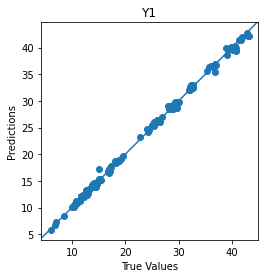

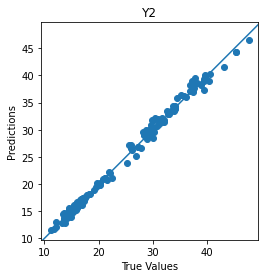

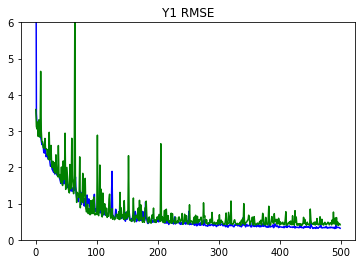

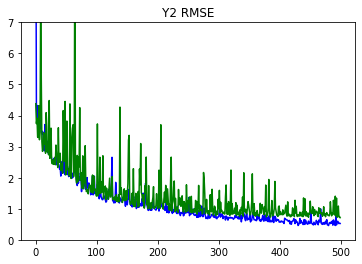

In [8]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)